## Q2.1 PCA Coding 

### Q2.1.1 Splitting

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_excel('Classification iris.xlsx')

class_names = dataset['class'].unique().tolist()
X = dataset.to_numpy()[:, 1:5]
y = dataset.to_numpy()[:, -1]

In [3]:
X_train, y_train = [], []
X_test, y_test = [], []
instance_ids_train, instance_ids_test = [], []

for i, name in enumerate(class_names):
    mask = (y == name)
    n_train = int(0.7 * mask.sum())
    
    X_train.append(X[mask][:n_train])
    y_train.append(y[mask][:n_train])

    X_test.append(X[mask][n_train:])
    y_test.append(y[mask][n_train:])

    instance_ids_train.extend((np.where(mask)[0][:n_train] + 1).tolist())
    instance_ids_test.extend((np.where(mask)[0][n_train:] + 1).tolist())

X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)
X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [5]:
print(X_train.dtype)
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)

object
object
object
object


As we can see, X_train & X_test is in 'object' datatype, which is not suitable for matrix calculation. We need to first convert it into float type.

In [6]:
print(X_train[0:5])
print('-------------')
print(X_test[0:5])
print('-------------')
print(y_train[0:5])
print('-------------')
print(y_test[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]]
-------------
[[5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]]
-------------
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
-------------
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [7]:
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

In [8]:
print(X_train[0:5])
print('-------------')
print(X_test[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
-------------
[[5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]]


In [9]:
print(X_train.dtype)
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)

float64
object
float64
object


In [10]:
answer = f"""
Q2.2.1 Split training set and test set:
Training set: {instance_ids_train}

Test set: {instance_ids_test}
""".strip()

print(answer)

Q2.2.1 Split training set and test set:
Training set: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]

Test set: [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]


### Q2.1.2 SVD decomposition

In [11]:
# Step 1: Calculate the mean vector and empirical covariance matrix
mu = np.mean(X_train, axis=0) # compute for each column(feature)
X_centered = X_train - mu
cov_matrix = np.dot(X_centered.T, X_centered) / X_centered.shape[0] # normalized by N 
# cov_matrix should be a 4*4 matrix since it has 4 features



In [12]:
# Step 2: Calculate eigenvalues and eigenvectors 
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 3: Rank eigenvalues and eigenvectors in descending order, then reorder the vectors accordingly
sorted_indices = np.argsort(eigenvalues)[::-1] # indices sorted in descending orders 
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

print("Q2.1.2 SVD decomposition:")

# Report the results in the required format
print(f"Mean vector: {mu}\n")
print(f"Covariance matrix:\n{cov_matrix}\n")
print(f"Eigenvalues (vector): {eigenvalues_sorted}\n")
print(f"Eigenvectors (matrix):\n{eigenvectors_sorted}\n")

Q2.1.2 SVD decomposition:
Mean vector: [5.89047619 3.05809524 3.80571429 1.18666667]

Covariance matrix:
[[ 0.71019501 -0.05001814  1.30319728  0.50244444]
 [-0.05001814  0.20719637 -0.3829034  -0.14170159]
 [ 1.30319728 -0.3829034   3.19901497  1.28779048]
 [ 0.50244444 -0.14170159  1.28779048  0.55791746]]

Eigenvalues (vector): [4.30938932 0.2677887  0.07822324 0.01892255]

Eigenvectors (matrix):
[[ 0.3612084  -0.67668874 -0.5437191   0.34057361]
 [-0.09667266 -0.71059308  0.61616041 -0.32566581]
 [ 0.86000139  0.16246182  0.06924822 -0.47875719]
 [ 0.34724702  0.10371103  0.56561522  0.74077186]]



### Q2.1.3 Project to 1 dimension

The representation of \( x \), i.e., \( z \), should be in the shape of $$\mathbb{R}^{N \times K};$$  
The reconstruction of \( x \), i.e., \( \tilde{x} \), should be in the shape of $$\mathbb{R}^{N \times D}.$$



In [ ]:
# Step 1: Derive the projection matrix W (using the eigenvector corresponding to the largest K-th eigenvalue)
#W = eigenvectors_sorted[:, 0]  # Shape: (4,1)
K = 1
W = eigenvectors_sorted[:,:K]
U = W  # For reporting purposes

# Step 2: Center the training and test data using the mean vector mu
# The centering of X_test should also use mu to guarantee consistency in transformation
X_train_centered = X_train - mu  # Shape: (105, 4)
X_test_centered = X_test - mu    # Shape: (45, 4) 

# Step 3: Project the centered data onto the 1-dimensional subspace
X_train_pca_1 = X_train_centered @ W  # Shape: (105, 1)
X_test_pca_1 = X_test_centered @ W    # Shape: (45, 1)

# Step 4: Reconstruct the data from the projected subspace
X_train_reconstructed_1 = (X_train_pca_1 @ W.T) + mu  # Shape: (105, 4)
X_test_reconstructed_1 = (X_test_pca_1 @ W.T) + mu    # Shape: (45, 4)

# Step 5: Center the reconstructed data
mu_train_1 = np.mean(X_train_reconstructed_1, axis=0)
mu_test_1 = np.mean(X_test_reconstructed_1,axis=0)

# Step 6: Calculate the variance of the original data
variance_train_1 = np.mean(np.sum((X_train_reconstructed_1 - mu_train_1) ** 2, axis=1))
variance_test_1 = np.mean(np.sum((X_test_reconstructed_1 - mu_test_1) ** 2, axis=1))

# Step 7: Calculate the reconstruction error
reconstruction_loss_train_1 = np.mean(np.sum((X_train - X_train_reconstructed_1) ** 2, axis=1))
reconstruction_loss_test_1 = np.mean(np.sum((X_test - X_test_reconstructed_1) ** 2, axis=1))

# Step 8: Report the results
report = f"""
Q2.1.3 Project onto 1-dimensional subspace and reconstruct:

Projection matrix W: 
{U}

Shape of X train mapped: {X_train_pca_1.shape}, Shape of X train reconstructed: {X_train_reconstructed_1.shape}
Variance train: {variance_train_1}
Reconstruction loss train: {reconstruction_loss_train_1}

Shape of X test mapped: {X_test_pca_1.shape}, Shape of X test reconstructed: {X_test_reconstructed_1.shape}
Variance test: {variance_test_1}
Reconstruction loss test: {reconstruction_loss_test_1}
"""

print(report)



Q2.1.3 Project onto 1-dimensional subspace and reconstruct:

Projection matrix W: 
[[ 0.3612084 ]
 [-0.09667266]
 [ 0.86000139]
 [ 0.34724702]]

Shape of X train mapped: (105, 1), Shape of X train reconstructed: (105, 4)
Variance train: 4.309389319247093
Reconstruction loss train: 0.36493449027671576

Shape of X test mapped: (45, 1), Shape of X test reconstructed: (45, 4)
Variance test: 3.907084095695329
Reconstruction loss test: 0.2997891222678479



### Q2.1.4 Project to 2 dimension

In [27]:
# Step 1: Derive the projection matrix W (using the eigenvectors corresponding to the two largest eigenvalues)
K = 2
W = eigenvectors_sorted[:, :K]  # Shape: (4, 2)
U = W  # For reporting purposes


# Step 2: Project the centered data onto the 2-dimensional subspace
X_train_pca_2 = X_train_centered @ W  # Shape: (105, 2)
X_test_pca_2 = X_test_centered @ W    # Shape: (45, 2)

# Step 3: Reconstruct the data from the projected subspace
X_train_reconstructed_2 = (X_train_pca_2 @ W.T) + mu  # Shape: (105, 4)
X_test_reconstructed_2 = (X_test_pca_2 @ W.T) + mu    # Shape: (45, 4)

# Step 4: Center the reconstructed data
mu_train_2 = np.mean(X_train_reconstructed_2, axis=0)
mu_test_2 = np.mean(X_test_reconstructed_2,axis=0)

# Step 5: Calculate the variance of the original data
variance_train_2 = np.mean(np.sum((X_train_reconstructed_2 - mu_train_2) ** 2, axis=1))
variance_test_2 = np.mean(np.sum((X_test_reconstructed_2 - mu_test_2) ** 2, axis=1))

# Step 6: Calculate the reconstruction error
reconstruction_loss_train_2 = np.mean(np.sum((X_train - X_train_reconstructed_2) ** 2, axis=1))
reconstruction_loss_test_2 = np.mean(np.sum((X_test - X_test_reconstructed_2) ** 2, axis=1))

# Step 7: Report the results
report = f"""
Q2.1.4 Project onto 2-dimensional subspace and reconstruct:

Projection matrix W: 
{U}

Shape of X train mapped: {X_train_pca_2.shape}, Shape of X train reconstruct: {X_train_reconstructed_2.shape}
Variance train: {variance_train_2}
Reconstruction loss train: {reconstruction_loss_train_2}

Shape of X test mapped: {X_test_pca_2.shape}, Shape of X test reconstruct: {X_test_reconstructed_2.shape}
Variance test: {variance_test_2}
Reconstruction loss test: {reconstruction_loss_test_2}
"""

print(report)



Q2.1.4 Project onto 2-dimensional subspace and reconstruct:

Projection matrix W: 
[[ 0.3612084  -0.67668874]
 [-0.09667266 -0.71059308]
 [ 0.86000139  0.16246182]
 [ 0.34724702  0.10371103]]

Shape of X train mapped: (105, 2), Shape of X train reconstruct: (105, 4)
Variance train: 4.577178016423884
Reconstruction loss train: 0.09714579309992513

Shape of X test mapped: (45, 2), Shape of X test reconstruct: (45, 4)
Variance test: 4.078378031615012
Reconstruction loss test: 0.11952572036446978



### Q.2.1.5 Project to 3 dimension

In [28]:
# Step 1: Derive the projection matrix W (using the eigenvectors corresponding to the three largest eigenvalues)
K= 3
W = eigenvectors_sorted[:, :K]  # Shape: (4, 3)
U = W

# Step 2: Project the centered data onto the 3-dimensional subspace
X_train_pca_3 = X_train_centered @ W  # Shape: (105, 3)
X_test_pca_3 = X_test_centered @ W    # Shape: (45, 3)

# Step 3: Reconstruct the data from the projected subspace
X_train_reconstructed_3 = (X_train_pca_3 @ W.T) + mu  # Shape: (105, 4)
X_test_reconstructed_3 = (X_test_pca_3 @ W.T) + mu    # Shape: (45, 4)

# Step 4: Center the reconstructed data
mu_train_3 = np.mean(X_train_reconstructed_3, axis=0)
mu_test_3 = np.mean(X_test_reconstructed_3,axis=0)

# Step 5: Calculate the variance of the original data
variance_train_3 = np.mean(np.sum((X_train_reconstructed_3 - mu_train_3) ** 2, axis=1))
variance_test_3 = np.mean(np.sum((X_test_reconstructed_3 - mu_test_3) ** 2, axis=1))

# Step 6: Calculate the reconstruction error
reconstruction_loss_train_3 = np.mean(np.sum((X_train - X_train_reconstructed_3) ** 2, axis=1))
reconstruction_loss_test_3 = np.mean(np.sum((X_test - X_test_reconstructed_3) ** 2, axis=1))

# Step 7: Report the results
report = f"""
Q2.1.5 Project onto 3-dimensional subspace and reconstruct:

Projection matrix W: 
{U}

Shape of X train mapped: {X_train_pca_3.shape}, Shape of X train reconstruct: {X_train_reconstructed_3.shape}
Variance train: {variance_train_3}
Reconstruction loss train: {reconstruction_loss_train_3}

Shape of X test mapped: {X_test_pca_3.shape}, Shape of X test reconstruct: {X_test_reconstructed_3.shape}
Variance test: {variance_test_3}
Reconstruction loss test: {reconstruction_loss_test_3}
"""

print(report)



Q2.1.5 Project onto 3-dimensional subspace and reconstruct:

Projection matrix W: 
[[ 0.3612084  -0.67668874 -0.5437191 ]
 [-0.09667266 -0.71059308  0.61616041]
 [ 0.86000139  0.16246182  0.06924822]
 [ 0.34724702  0.10371103  0.56561522]]

Shape of X train mapped: (105, 3), Shape of X train reconstruct: (105, 4)
Variance train: 4.655401260550289
Reconstruction loss train: 0.018922548973519974

Shape of X test mapped: (45, 3), Shape of X test reconstruct: (45, 4)
Variance test: 4.1541473257389425
Reconstruction loss test: 0.03587183464503327



In [30]:
variance_train_3 = eigenvalues_sorted[:K].sum()
variance_train_3

4.6554012605502875

As we can observe, the result of training data variance calculated by eigenvalues_sorted[:K].sum() and formula $$ \frac{1}{N} \sum_{n=1}^N \|\mathbf{x}^{(n)} - \tilde{\mu}|^2 $$ is eactly the same. Which indicates that: Variance is explained by the first K principal components.

### Q2.1.6 Plotting to visualize the reduction result

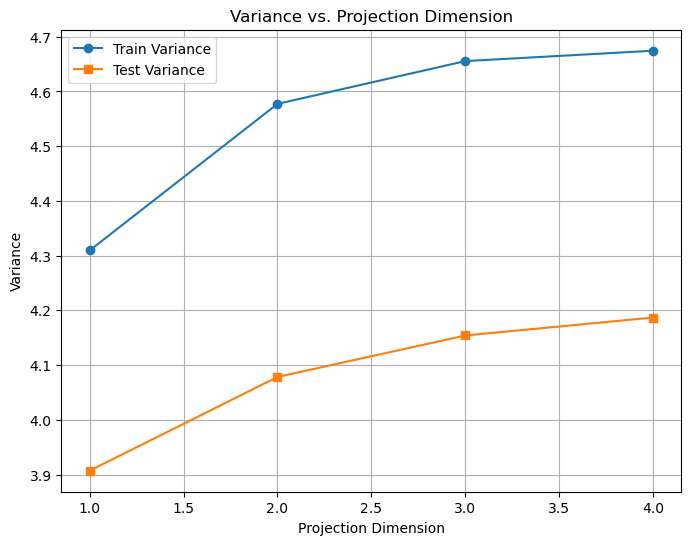

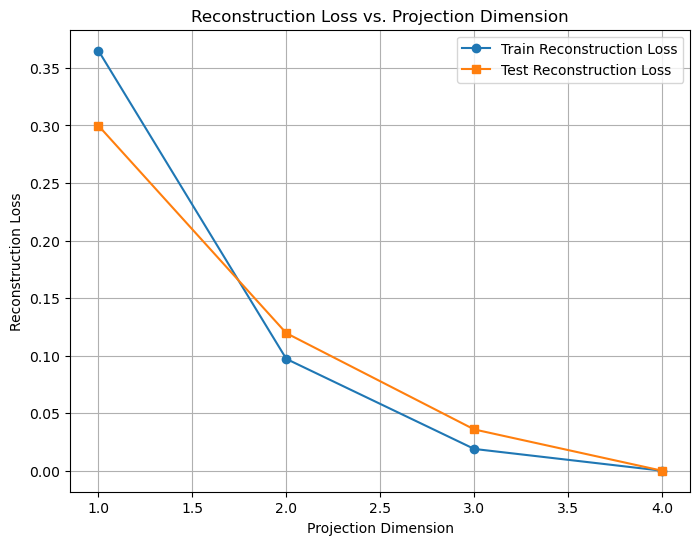

In [31]:
import matplotlib.pyplot as plt

# Initialize lists to store results
dimensions = [1, 2, 3, 4]
variance_train_list = []
variance_test_list = []
reconstruction_loss_train_list = []
reconstruction_loss_test_list = []
variance_captured_list = []

# Total variance (sum of all eigenvalues)
total_variance = np.sum(eigenvalues_sorted)

for d in dimensions:
    # Step 1: Derive the projection matrix W using the top 'd' eigenvectors
    W = eigenvectors_sorted[:, :d]  # Shape: (4, d)
    
    # Step 2: Center the training and test data using the mean vector mu
    X_train_centered = X_train - mu  # Shape: (105, 4)
    X_test_centered = X_test - mu    # Shape: (45, 4)
    
    # Step 3: Project the centered data onto the 'd'-dimensional subspace
    X_train_pca = X_train_centered @ W  # Shape: (105, d)
    X_test_pca = X_test_centered @ W    # Shape: (45, d)
    
    # Step 4: Reconstruct the data from the projected subspace
    X_train_reconstructed = (X_train_pca @ W.T) + mu  # Shape: (105, 4)
    X_test_reconstructed = (X_test_pca @ W.T) + mu    # Shape: (45, 4)

    # Step 5: Get the centered reconstructed data
    mu_train = np.mean(X_train_reconstructed, axis=0)
    mu_test = np.mean(X_test_reconstructed,axis=0)

    # Step 6: Calculate the variance of the original data
    variance_train = np.mean(np.sum((X_train_reconstructed - mu_train) ** 2, axis=1))
    variance_test = np.mean(np.sum((X_test_reconstructed - mu_test) ** 2, axis=1))

    variance_train_list.append(variance_train)
    variance_test_list.append(variance_test)
    
    # Step 7: Calculate the reconstruction error
    reconstruction_loss_train = np.mean(np.sum((X_train - X_train_reconstructed) ** 2, axis=1))
    reconstruction_loss_test = np.mean(np.sum((X_test - X_test_reconstructed) ** 2, axis=1))

    reconstruction_loss_train_list.append(reconstruction_loss_train)
    reconstruction_loss_test_list.append(reconstruction_loss_test)

# Plotting Variance Captured vs. Dimension
plt.figure(figsize=(8, 6))
plt.plot(dimensions, variance_train_list, marker='o',label = 'Train Variance')
plt.plot(dimensions, variance_test_list, marker='s',label='Test Variance')
plt.title('Variance vs. Projection Dimension')
plt.xlabel('Projection Dimension')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Reconstruction Loss vs. Dimension
plt.figure(figsize=(8, 6))
plt.plot(dimensions, reconstruction_loss_train_list, marker='o', label='Train Reconstruction Loss')
plt.plot(dimensions, reconstruction_loss_test_list, marker='s', label='Test Reconstruction Loss')
plt.title('Reconstruction Loss vs. Projection Dimension')
plt.xlabel('Projection Dimension')
plt.ylabel('Reconstruction Loss')
plt.legend()
plt.grid(True)
plt.show()



In [32]:
# Generate the report
report = f"""
Q2.1.6 Plotting:
Dimension - Variance Captured:
[Figure Above]

As the projection dimension increases from 1 to 4, the variance captured by the principal components increases. At dimension 4, 100% of the variance is captured, indicating that all original data variance is retained.

Dimension - Reconstruction Loss:
[Figure Above]

The reconstruction loss decreases as the projection dimension increases. With more principal components, the reconstructed data becomes closer to the original data, resulting in lower reconstruction loss. At dimension 4, the reconstruction loss is zero or near-zero, indicating perfect reconstruction.
"""

print(report)


Q2.1.6 Plotting:
Dimension - Variance Captured:
[Figure Above]

As the projection dimension increases from 1 to 4, the variance captured by the principal components increases. At dimension 4, 100% of the variance is captured, indicating that all original data variance is retained.

Dimension - Reconstruction Loss:
[Figure Above]

The reconstruction loss decreases as the projection dimension increases. With more principal components, the reconstructed data becomes closer to the original data, resulting in lower reconstruction loss. At dimension 4, the reconstruction loss is zero or near-zero, indicating perfect reconstruction.

